<a href="https://colab.research.google.com/github/ShashankS1ngh/ML/blob/main/GridSearch_of_HeartDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from IPython.core.display import display, HTML, Javascript

color_map = ['#8A0030', '#BA1141']

prompt = color_map[-1]
main_color = color_map[0]
strong_main_color = color_map[1]
custom_colors = [strong_main_color, main_color]

css_file = '''
div #notebook {
background-color: white;
line-height: 20px;
}

#notebook-container {
%s
margin-top: 2em;
padding-top: 2em;
border-top: 4px solid %s;
-webkit-box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5);
    box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5);
}

div .input {
margin-bottom: 1em;
}

.rendered_html h1, .rendered_html h2, .rendered_html h3, .rendered_html h4, .rendered_html h5, .rendered_html h6 {
color: %s;
font-weight: 600;
}

div.input_area {
border: none;
    background-color: %s;
    border-top: 2px solid %s;
}

div.input_prompt {
color: %s;
}

div.output_prompt {
color: %s; 
}

div.cell.selected:before, div.cell.selected.jupyter-soft-selected:before {
background: %s;
}

div.cell.selected, div.cell.selected.jupyter-soft-selected {
    border-color: %s;
}

.edit_mode div.cell.selected:before {
background: %s;
}

.edit_mode div.cell.selected {
border-color: %s;

}
'''

def to_rgb(h): 
    return tuple(int(h[i:i+2], 16) for i in [0, 2, 4])

main_color_rgba = 'rgba(%s, %s, %s, 0.1)' % (to_rgb(main_color[1:]))
open('notebook.css', 'w').write(css_file % ('width: 95%;', main_color, main_color, main_color_rgba, main_color,  main_color, prompt, main_color, main_color, main_color, main_color))

def nb(): 
    return HTML("<style>" + open("notebook.css", "r").read() + "</style>")
nb()

In [16]:
# --- Importing Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import yellowbrick
import pickle

from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100
set_palette('dark')

In [17]:
red_grad = ['#FF0000', '#BF0000', '#800000', '#400000', '#000000']
pink_grad = ['#8A0030', '#BA1141', '#FF5C8A', '#FF99B9', '#FFDEEB']
purple_grad = ['#4C0028', '#7F0043', '#8E004C', '#A80059', '#C10067']
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']


In [18]:
def Heart_Disease_data(set_data):
  housing_path="https://raw.githubusercontent.com/ShashankS1ngh/ML/main/DATASETS/"
  csv_path=os.path.join(housing_path,set_data)
  return pd.read_csv(csv_path)

In [19]:
df= Heart_Disease_data("Processed.csv")

In [20]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,8,0,1,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,13,0,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,10,0,1,1,2,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,12,0,0,0,3,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,5,0,0,1,4,8.0,0,0,0


In [21]:
print(df)

        HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                  0  16.60        1                0       0             3.0   
1                  0  20.34        0                0       1             0.0   
2                  0  26.58        1                0       0            20.0   
3                  0  24.21        0                0       0             0.0   
4                  0  23.71        0                0       0            28.0   
...              ...    ...      ...              ...     ...             ...   
319790             1  27.41        1                0       0             7.0   
319791             0  29.84        1                0       0             0.0   
319792             0  24.24        0                0       0             0.0   
319793             0  32.81        0                0       0             0.0   
319794             0  46.56        0                0       0             0.0   

        MentalHealth  DiffW

In [22]:
df.select_dtypes(exclude='object').describe().T.style.background_gradient(cmap='PuRd').set_properties(**{'font-family': 'Segoe UI'})

,count,mean,std,min,25%,50%,75%,max
HeartDisease,319795.000000,0.085595,0.279766,0.000000,0.000000,0.000000,0.000000,1.000000
BMI,319795.000000,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
Smoking,319795.000000,0.412477,0.492281,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholDrinking,319795.000000,0.068097,0.251912,0.000000,0.000000,0.000000,0.000000,1.000000
Stroke,319795.000000,0.037740,0.190567,0.000000,0.000000,0.000000,0.000000,1.000000
PhysicalHealth,319795.000000,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,319795.000000,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
DiffWalking,319795.000000,0.138870,0.345812,0.000000,0.000000,0.000000,0.000000,1.000000
Sex,319795.000000,0.475273,0.499389,0.000000,0.000000,0.000000,1.000000,1.000000
AgeCategory,319795.000000,7.514536,3.564759,1.000000,5.000000,8.000000,10.000000,13.000000


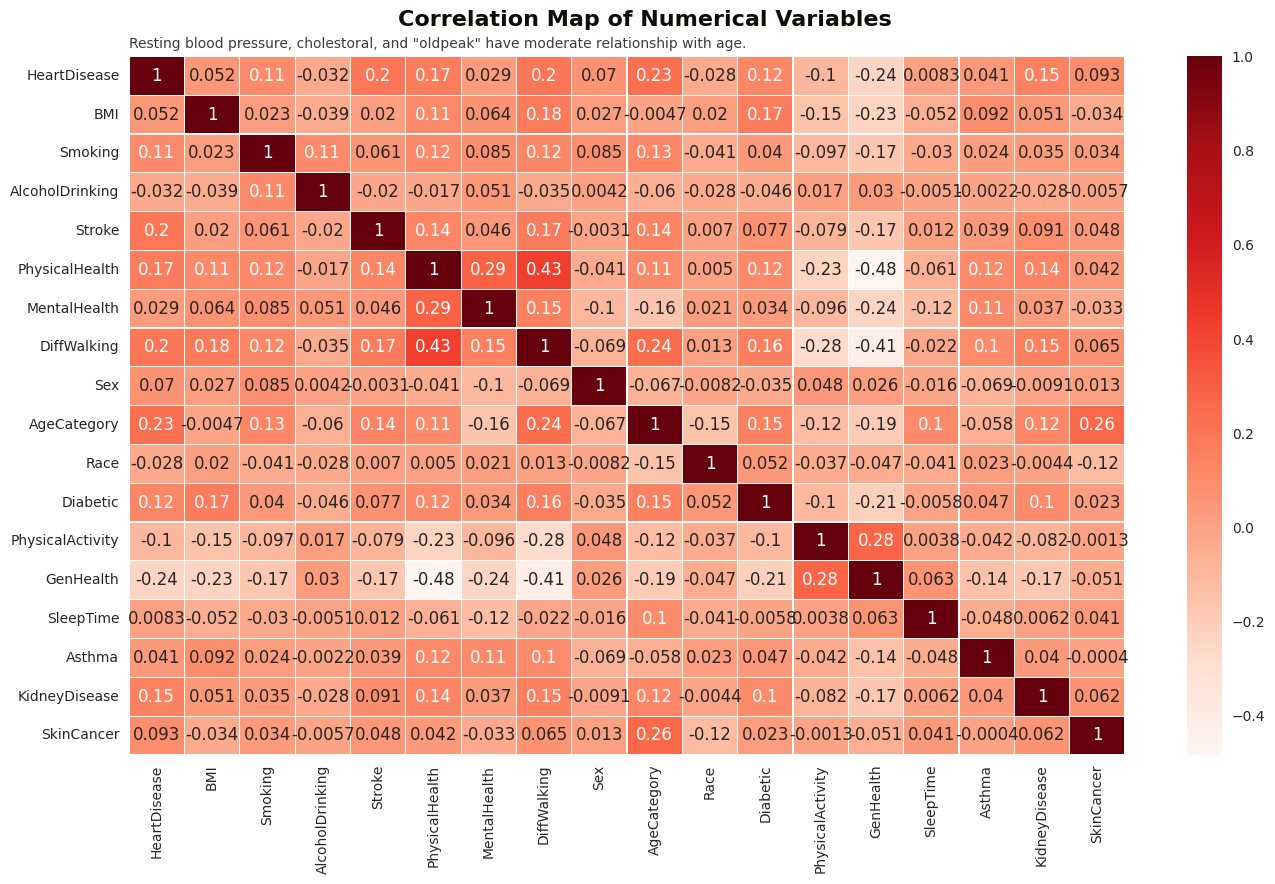

In [23]:

plt.figure(figsize=(14, 9))
sns.heatmap(df.corr(), annot=True, cmap='Reds', linewidths=0.1)
plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy', 
             x=0.29, y=1.02, ha='left', fontsize='16', fontfamily='sans-serif', 
             color=black_grad[0])
plt.title('Resting blood pressure, cholestoral, and "oldpeak" have moderate relationship with age.', 
          fontsize='10', fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

In [24]:
from sklearn.feature_selection import RFE, RFECV, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from statsmodels.tools import add_constant

In [25]:
data_frame = Heart_Disease_data("Processed.csv")
df1 = pd.DataFrame(data_frame)

In [26]:
df1.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [27]:
rfc = RandomForestClassifier()
rfecv = RFECV(estimator = rfc, step = 1, cv = StratifiedKFold(10), scoring = 'r2',verbose=1)
X_components=df1.columns
X=df1[X_components]
y=df.HeartDisease
print(X.shape)
print(y.shape)

rfecv.fit(X, y)

(319795, 18)
(319795,)
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estima

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(), scoring='r2', verbose=1)

In [28]:
X.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [29]:
X_components=df1.columns
X=df1[X_components]
rfecv_array = [True, True, False,True,False,False,True,False,True,True,True,True,True,True]
res = [i for i, val in enumerate(rfecv_array) if not val]
X.drop(X.columns[res], axis=1, inplace=True)

In [30]:
df.head().style.background_gradient(cmap='Reds').hide_index().set_properties(**{'font-family': 'Segoe UI'})

HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.600000,1,0,0,3.000000,30.000000,0,0,8,0,1,1,4,5.000000,1,0,1
0,20.340000,0,0,1,0.000000,0.000000,0,0,13,0,0,1,4,7.000000,0,0,0
0,26.580000,1,0,0,20.000000,30.000000,0,1,10,0,1,1,2,8.000000,1,0,0
0,24.210000,0,0,0,0.000000,0.000000,0,0,12,0,0,0,3,6.000000,0,0,1
0,23.710000,0,0,0,28.000000,0.000000,1,0,5,0,0,1,4,8.000000,0,0,0


In [31]:
x = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

In [32]:
x = MinMaxScaler().fit_transform(x)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=4)

In [34]:
SVMclassifier = SVC(kernel='linear', max_iter=1000, C=100, probability=True)
SVMclassifier.fit(x_train, y_train)

y_pred_SVM = SVMclassifier.predict(x_test)

In [35]:
# --- SVM Accuracy ---
SVMAcc = accuracy_score(y_pred_SVM, y_test)
print('.:. Support Vector Machine Accuracy:'+'\033[1m {:.2f}%'.format(SVMAcc*100)+' .:.')

# --- SVM Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_SVM))


.:. Support Vector Machine Accuracy: 51.68% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.93      0.51      0.66     73126
           1       0.10      0.61      0.18      6823

    accuracy                           0.52     79949
   macro avg       0.52      0.56      0.42     79949
weighted avg       0.86      0.52      0.62     79949



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

grid.fit(x_train, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.915 total time=40.7min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.915 total time=34.5min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.915 total time=31.3min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.915 total time=32.1min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.915 total time=34.5min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.914 total time=16.3min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.914 total time=16.5min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.914 total time=13.8min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.914 total time=16.7min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.914 total time=13.8min
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.914 total time= 7.6min
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [1]:
print(grid.best_params_)
print(grid.best_estimator_)


NameError: ignored

In [ ]:
grid_predictions = grid.predict(x_test)
print(classification_report(y_test, grid_predictions))


In [ ]:
KNNClassifier = KNeighborsClassifier(n_neighbors=3)
KNNClassifier.fit(x_train, y_train)

y_pred_KNN = KNNClassifier.predict(x_test)

In [ ]:
KNNAcc = accuracy_score(y_pred_KNN, y_test)
print('.:. K-Nearest Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(KNNAcc*100)+' .:.')

In [ ]:
print(classification_report(y_test, y_pred_KNN))